# Support Vector Machines

# Introduction

Support vector machines (SVMs) will be used to build a spam classifier.

## Example Dataset 1

Figure 1 depicts a 2D example dataset which can be separated by a linear boundary. In this dataset, the positions of the positive examples (indicated with `+`) and the negative examples (indicated with `o`) suggest a natural separation indicated by the gap. However, there is an outlier positive example `+` on the far left at about (0.1, 4.1), which can affect the SVM decision boundary.

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data1 = loadmat('ex6data1.mat')
for k in data1:
    print(k)

__header__
__version__
__globals__
X
y


Shapes of X(51, 2) and y(51, 1)


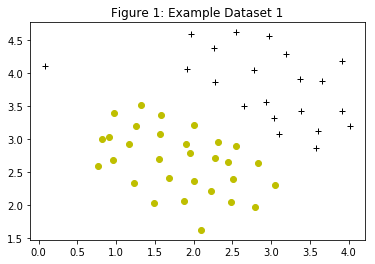

In [2]:
X = data1['X']
y = data1['y']

print("Shapes of X{} and y{}".format(X.shape, y.shape))

# Create a function to plot the data.
def plotData(X, y, title):
    """
    Plots the data points with '+' for the positive examples
    and 'o' for the negative examples.
    Args:
        X: array (m, 2)
        y: array (m, 1)
        title: str
    """
    # Find indices of positive and negative examples.
    y = y.flatten()
    pos = y==1
    neg = y==0

    # Plot examples.
    plt.title(title)
    plt.plot(X[:,0][pos], X[:,1][pos], "k+")
    plt.plot(X[:,0][neg], X[:,1][neg], "yo")
    plt.show()

plotData(X, y, "Figure 1: Example Dataset 1")

Different values of the $C$ parameter with SVMs will be tried. The $C$ parameter is a positive value that controls the penalty for misclassified training examples. A large $C$ parameter tells the SVM to try to classify all the examples correctly. $C$ plays a role similar to $\frac{1}{\lambda}$, where $\lambda$ is the regularization parameter that is used for logistic regression.

When $C=1$, the SVM puts the decision boundary in the gap between the two datasets and misclassifies the data point on the far left (Figure 2). When $C=100$, the SVM classifies every single example correctly, but has a decision boundary that does not appear to be a natural fit for the data (Figure 3).

* **Note:** Most SVM software packages automatically add the extra feature $x_0=1$ and automatically take care of learning the intercept term $\theta_0$. The code should be working with training examples $x\in\mathbb{R}^n$ (rather than $x\in\mathbb{R}^{n+1}$); for example, in the first example dataset $x\in\mathbb{R}^2$.

## SVM with Gaussian Kernels

SVMs will be used to do non-linear classification with Gaussian kernels on datasets that are not linearly separable.

### Gaussian Kernel

To find non-linear decision boundaries with the SVM, first a Gaussian kernel should be implemented. The Gaussian kernel is a similarity function that measures the “distance” between a pair of examples, $\left(x^{(i)},x^{(j)}\right)$. The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to $0$) as the examples are further apart.

The code in `gaussianKernel` computes the Gaussian kernel between two examples, $\left(x^{(i)},x^{(j)}\right)$. The Gaussian kernel function is defined as:

$$K_{gaussian}\left(x^{(i)},x^{(j)}\right) = exp\left(- \frac{\|x^{(i)}-x^{(j)}\|^2}{2\sigma^2}\right) = exp\left(- \frac{\sum_{k=1}^{n}\left(x_k^{(i)}-x_k^{(j)}\right)^2}{2\sigma^2}\right) $$

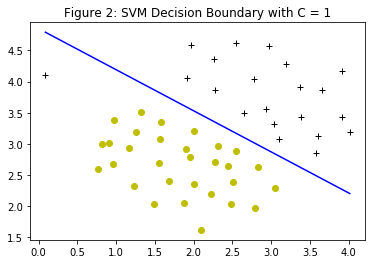

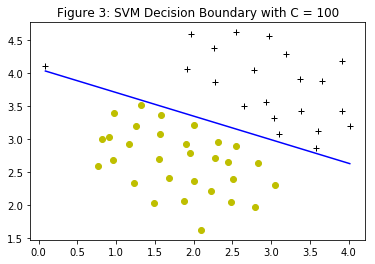

Evaluating the Gaussian Kernel ...
Gaussian Kernel between x1= [1, 2, 1], x2= [0, 4, -1], sigma= 2: 
[[ 0.8824969   0.32465247  0.60653066]
 [ 0.60653066  0.60653066  0.32465247]
 [ 0.8824969   0.32465247  0.60653066]]


In [3]:
from sklearn import svm 
import numpy as np

# Create a function that trains a SVM classifier.
def svmTrain(X, y, C, kernelFunction, tol, max_passes, sigma=None):
    """
    Trains a SVM classifier using "svm" from "sklearn"
    and returns the trained model.
    Args:
        X: array (# training examples, # features)
        Y: array (# training examples, 1),
           contains 1 for positive examples 
           and 0 for negative examples.
        C: float, regularization parameter
        kernelFunction: string, specifies the kernel type
                        to be used in the algorithm. It must
                        be one of 'linear', 'poly', 'rbf',
                        'sigmoid', 'precomputed' or a callable.
        tol: float, a tolerance value used for determining
             equality of floating point numbers.
        max_passes: int, controls the number of iterations
                    over the dataset (without changes to alpha)
                    before the algorithm quits.
        sigma: float
    Returns:
        The classifier trained model
    """
    # Change the shape of y to (# training examples, ),
    # a 1d array is expected. 
    y = y.ravel()
    
    if kernelFunction == 'gaussian':
        clf = svm.SVC(C=C, kernel='precomputed', tol=tol, max_iter=max_passes)
        return clf.fit(gaussianKernel(X, X, sigma=sigma), y)
    else:
        clf = svm.SVC(C=C, kernel=kernelFunction, tol=tol, max_iter=max_passes)
        return clf.fit(X, y)

# Create a funtion that computes the Gaussian kernel between two examples.
def gaussianKernel(X1, X2, sigma):
    """
    Returns a gaussian kernel between X1 and X2
    and returns the similarity matrix in sim.
    Define the kernel by either giving the kernel
    as a python function or by precomputing the Gram
    matrix.
    Args:
        X1: array
        X2: array
        sigma: float, the bandwidth parameter
    Returns:
        Gram: array
    """
    Gram = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            x1 = x1.ravel()
            x2 = x2.ravel()
            Gram[i, j] = np.exp(-np.sum(np.square(x1 - x2)) / (2 * (sigma**2)))
    return Gram


# def gaussianKernel(x1, x2, sigma):
#     """
#     Returns a gaussian kernel between x1 and x2
#     and returns the similarity value in sim.
#     Args:
#         x1: vector 1d array
#         x2: vector 1d array
#         sigma: float, the bandwidth parameter
#     Returns:
#         sim: float
#     """
#     # Ensure that x1 and x2 are column vectors
#     x1 = x1.ravel()
#     x2 = x2.ravel()
    
#     sim = np.exp(-np.sum(np.square(x1 - x2)) / (2 * (sigma**2)))
#     return sim


# Create a funtion that plots a linear decision boundary.
def visualizeBoundaryLinear(X, y, model, title):
    """
    Plots a linear decision boundary learned
    by the SVM and overlays the data on it.
    Args:
        X: array (# training examples, # features)
        y: array (# training examples, 1),
           contains 1 for positive examples 
           and 0 for negative examples.
        model: the classifier trained model from 'svmTrain()'
        title: str
    """
    # Get the separating hyperplane.
    w = model.coef_[0]
    a = -w[0] / w[1]
    # Only 2 points are required to define a line, e.g. min and max.
    xx = np.array([X[:,0].min(), X[:,0].max()])
    yy = a * xx - (model.intercept_[0]) / w[1]
    # Plot the separating line.
    plt.plot(xx, yy, 'b-')
    # Plot the training data.
    plotData(X, y, title)

# Change the C value below and see how the decision boundary varies.
C = 1
model = svmTrain(X, y, C, 'linear', 1e-3, -1)
visualizeBoundaryLinear(X, y, model, "Figure 2: SVM Decision Boundary with C = 1")
C = 100
model = svmTrain(X, y, C, 'linear', 1e-3, -1)
visualizeBoundaryLinear(X, y, model, "Figure 3: SVM Decision Boundary with C = 100")

print("Evaluating the Gaussian Kernel ...")
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussianKernel(x1, x2, sigma)
print("Gaussian Kernel between x1= [1, 2, 1], x2= [0, 4, -1], sigma= 2: \n{}".format(sim))

### Example Dataset 2

Figure 4 shows the dataset 2. From the figure, it can be observed that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the `Gaussian` kernel with the SVM, a non-linear decision boundary will be learnt, that can perform reasonably well for the dataset.

Shapes of X(863, 2) and y(863, 1)


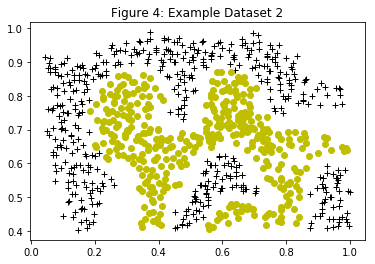

In [4]:
data2 = loadmat('ex6data2.mat')

X = data2['X']
y = data2['y']

print("Shapes of X{} and y{}".format(X.shape, y.shape))

plotData(X, y, "Figure 4: Example Dataset 2")

Figure 5 shows the decision boundary found by the SVM with a Gaussian kernel. The decision boundary is able to separate most of the positive and negative examples correctly and follows the contours of the dataset well.

Training SVM with RBF Kernel (this may take 1 to 2 minutes)...


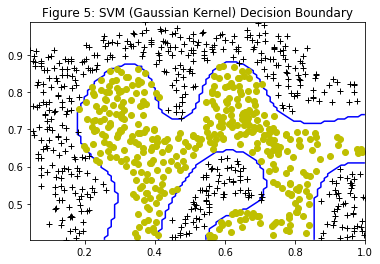

In [5]:
# Create a funtion that plots a non-linear decision boundary.
def visualizeBoundary(X, y, model, sigma, title):
    """
    Plots a non-linear decision boundary learned
    by the SVM and overlays the data on it.
    Args:
        X: array (# training examples, # features)
        y: array (# training examples, 1),
           contains 1 for positive examples 
           and 0 for negative examples.
        model: the classifier trained model from 'svmTrain()'
        title: str
    """
    # Make classification predictions over a grid of values.
    x1plot = np.linspace(X[:,0].min(), X[:,0].max(), 100).T
    x2plot = np.linspace(X[:,1].min(), X[:,1].max(), 100).T
    X1, X2 = np.meshgrid(x1plot, x2plot)
    vals = np.zeros(X1.shape)
    for i in range(X1.shape[1]):
        this_X = np.column_stack((X1[:, i], X2[:, i]))
        vals[:, i] = model.predict(gaussianKernel(this_X, X, sigma))

    # Plot the SVM boundary
    plt.contour(X1, X2, vals, colors="b", levels=[0,0])
    # Plot the training data.
    plotData(X, y, title)

print("Training SVM with RBF Kernel (this may take 1 to 2 minutes)...")

# Set SVM parameters.
C = 1
sigma = 0.1

# We set the tolerance and max_passes lower here so that the code will run
# faster. However, in practice, you will want to run the training to convergence.
model = svmTrain(X, y, C, 'gaussian', 1e-3, 100, sigma)
visualizeBoundary(X, y, model, sigma, "Figure 5: SVM (Gaussian Kernel) Decision Boundary")

### Example Dataset 3

Figure 6 displays a third dataset. Again the SVM with the Gaussian kernel will be used with this dataset.

In the provided dataset, ex6data3.mat, the variables $X$, $y$, $Xval$, $yval$ are given. The SVM classifier is trained using the training set $(X, y)$ using parameters loaded from `dataset3Params`.

Shapes of X(211, 2) and y(211, 1)


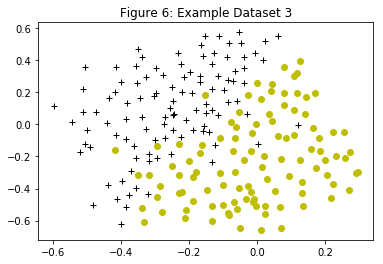

In [6]:
data3 = loadmat('ex6data3.mat')

X = data3['X']
y = data3['y']
Xval = data3['Xval']
yval = data3['yval']

print("Shapes of X{} and y{}".format(X.shape, y.shape))

plotData(X, y, "Figure 6: Example Dataset 3")

Using the cross validation set $Xval$, $yval$, the best $C$ and $\sigma$ parameter to use will be determined. Additional necessary code helps to search over the parameters $C$ and $\sigma$. For both $C$ and $\sigma$, it is suggested trying values in multiplicative steps $\left(e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30\right)$. Note that all possible pairs of values for $C$ and $\sigma$ should be tried $\left(e.g., C = 0.3 \text{ and } \sigma = 0.1\right)$. For example, for the 8 values of $C$ and $\sigma^2$ listed above, the training and evaluating (on the cross validation set) combinations of different models are $8^2 = 64$.

After determining the best $C$ and $\sigma$ parameters, the code in `dataset3Params` is modified, filling in the best parameters that were found. For the best parameters, the SVM returns a decision boundary shown in Figure 7.

* **Tip:** When implementing cross validation to select the best $C$ and $\sigma$ parameter to use, the error must be evaluated on the cross validation set. Recall that for classification, the error is defined as the fraction of the cross validation examples that were classified incorrectly. This error can be computed using `np.mean((predictions != yval).astype(int))`, where predictions is a vector containing all the predictions from the SVM, and `yval` are the true labels from the cross validation set.

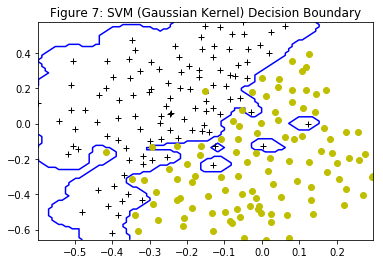

In [7]:
# Create a function to find the optimal parameters C and sigma.
def dataset3Params(X, y, Xval, yval):
    """
    Returns the choice of optimal C and sigma learning parameters -
    based on a cross-validation set - to use for SVM with RBF kernel.
    """
    predictions = dict()
    for C in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]:
        for sigma in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]:
            # Train the model on X and y.
            model = svmTrain(X, y, C, 'gaussian', 1e-5, -1, sigma)
            # Perform classification on samples in Xval.
            # For precomputed kernels, the expected shape of
            # X is [n_samples_validation, n_samples_train]
            prediction = model.predict(gaussianKernel(Xval, X, sigma))
            # Compute the prediction errors.
            predictions[(C, sigma)] = np.mean((prediction != yval).astype(int))
    C, sigma = min(predictions, key=predictions.get)
    return C, sigma

# Find the optimal C and sigma.
C, sigma = dataset3Params(X, y, Xval, yval)

# Train the SVM classifier with the optimal values of C and sigma.
model = svmTrain(X, y, C, 'gaussian', 1e-5, -1, sigma=sigma)

# Plot the data and the decision boundary.
visualizeBoundary(X, y, model, sigma, "Figure 7: SVM (Gaussian Kernel) Decision Boundary")